# Handwritten digit recognition project (PRCP-1002-HandwrittenDigits)



### Problem statement


#### Recognize Handwritten digit (0,9) using the MNIST dataset with full analysis, model creation, model comparision, and summary of challenges faced.

### Tasks

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:- Classify a given image of a handwritten digit into one of the 10 classes representing integer values from 0 to 9.

Task3:- Compare between various models and find the classifier that works
better.

In [2]:
# All important libraries imported

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from tensorflow.keras import datasets, models, layers, callbacks


In [3]:
# Load MNIST dataset from Keras

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)


Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


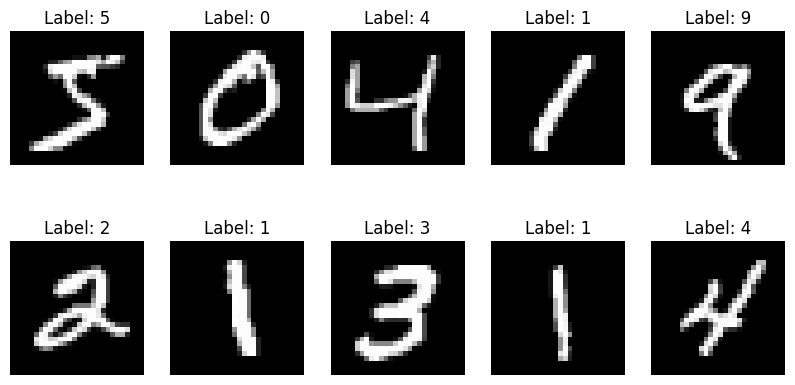

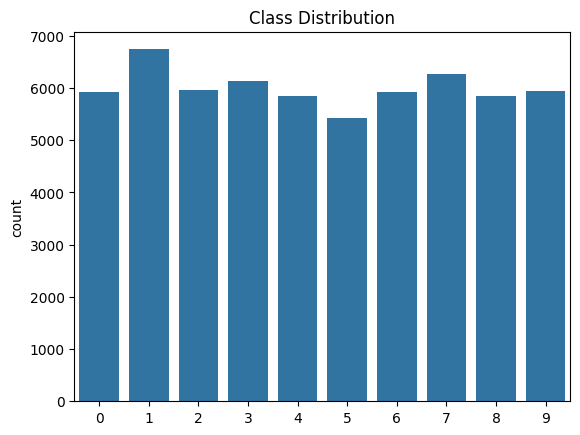

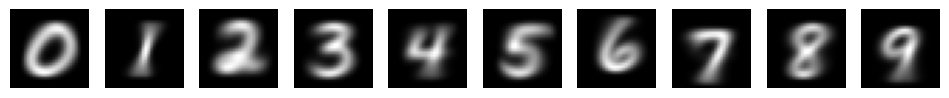

In [4]:
# Show some samples

fig, axs = plt.subplots(2,5, figsize=(10,5))
for i in range(10):
    axs[i//5, i%5].imshow(x_train[i], cmap='gray')
    axs[i//5, i%5].set_title(f"Label: {y_train[i]}")
    axs[i//5, i%5].axis('off')
plt.show()

# Class distribution
sns.countplot(x=y_train)
plt.title("Class Distribution")
plt.show()

# Mean image per digit
means = [x_train[y_train==d].mean(axis=0) for d in range(10)]
fig, axs = plt.subplots(1,10, figsize=(12,2))
for i,m in enumerate(means):
    axs[i].imshow(m, cmap='gray')
    axs[i].axis('off')
plt.show()


In [5]:
# Normalize pixel values

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# For CNN
x_train_cnn = x_train[..., np.newaxis]
x_test_cnn  = x_test[..., np.newaxis]

# For classical ML
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat  = x_test.reshape(len(x_test), -1)


In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_flat[:10000], y_train[:10000])  # subset for speed
knn_acc = knn.score(x_test_flat, y_test)
print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.9463


In [7]:
svm = SVC(kernel='rbf', gamma=0.01, C=5)
svm.fit(x_train_flat[:10000], y_train[:10000])  # subset for speed
svm_acc = svm.score(x_test_flat, y_test)
print("SVM Accuracy:", svm_acc)


SVM Accuracy: 0.965


In [8]:
cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cb = [callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
cnn.fit(x_train_cnn, y_train, validation_split=0.1, epochs=5, batch_size=128, callbacks=cb, verbose=2)
cnn_acc = cnn.evaluate(x_test_cnn, y_test, verbose=0)[1]
print("CNN Accuracy:", cnn_acc)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 - 43s - 103ms/step - accuracy: 0.9109 - loss: 0.2884 - val_accuracy: 0.9810 - val_loss: 0.0652
Epoch 2/5
422/422 - 41s - 98ms/step - accuracy: 0.9733 - loss: 0.0886 - val_accuracy: 0.9873 - val_loss: 0.0459
Epoch 3/5
422/422 - 81s - 192ms/step - accuracy: 0.9816 - loss: 0.0629 - val_accuracy: 0.9892 - val_loss: 0.0396
Epoch 4/5
422/422 - 41s - 96ms/step - accuracy: 0.9839 - loss: 0.0524 - val_accuracy: 0.9898 - val_loss: 0.0355
Epoch 5/5
422/422 - 42s - 99ms/step - accuracy: 0.9874 - loss: 0.0426 - val_accuracy: 0.9907 - val_loss: 0.0339
CNN Accuracy: 0.9907000064849854


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


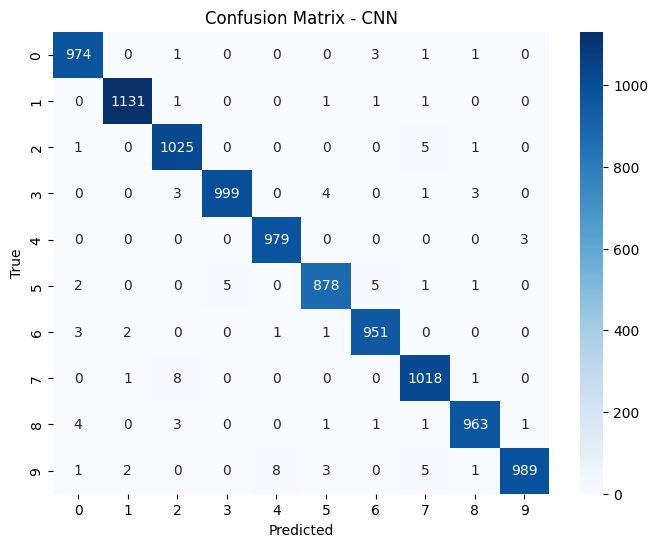

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [9]:
y_pred_cnn = np.argmax(cnn.predict(x_test_cnn), axis=1)
cm = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - CNN")
plt.show()

print(classification_report(y_test, y_pred_cnn))


In [12]:
results = pd.DataFrame([
    {"Model": "KNN ", "Accuracy": knn_acc},#(k=3)
    {"Model": "SVM ", "Accuracy": svm_acc},
    {"Model": "CNN", "Accuracy": cnn_acc}
])
print(results.sort_values("Accuracy", ascending=False))


  Model  Accuracy
2   CNN    0.9907
1  SVM     0.9650
0  KNN     0.9463


# Challenges faced

#### Computational Cost for Classical Models

KNN is slow during prediction because it compares every test image to every training image.

SVM with RBF can be memory-intensive on large datasets.

#### Model Comparison Complexity

Each model type requires different hyperparameters:

CNN → layers, filters, dropout, optimizer

SVM → C, gamma

KNN → k value, distance metric

Finding optimal settings for fair comparison can be time-consuming.

#### Image Quality and Noise

Digits can be slightly tilted, off-center, or have thicker/thinner strokes.

Some images may have faint writing or background noise.